#Softmax Regression Classifier with Twitter Covid Vaccination Data

**Mount Google Drive(to read the datasets)**

We will first mount the google drive storage to load the datasets. It is not necessary, but I did it this way in order to avoid uploading them every time. If you want, you can upload yours and just change the import paths. 

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


**Import necessary libraries**

Then, we will import the necessary libraries


In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import nltk
from nltk.corpus import stopwords
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score, precision_score, recall_score

pd.set_option('max_colwidth', 500)
%matplotlib inline

# Dataset loading
Now, let's load our datasets:

**Train Dataset**

In [ ]:
train_dataset = pd.read_csv('gdrive/MyDrive/NLP exercises/Datasets/Twitter Covid Vaccination data/vs_train.csv')
train_dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
train_dataset

,tweet,label
0,Sip N Shop Come thru right now #Marjais #PopularNobodies #MMR 🙌🙌🙌🙌 @ Marjais SipNShop http://t.co/JfWAH7uzWE,0
1,I don't know about you but My family and I will not take the #Covid19 vaccine anytime soon...,1
2,"@MSignorile Immunizations should be mandatory. Period. In Oklahoma, they won't let kids go to school without them. It's dangerous otherwise!",2
3,"President Obama spoke in favor of vaccination for children. Fox will start telling its viewers to ""choose"" against vaccination in 3,2,1...",0
4,"""@myfoxla: Arizona monitoring hundreds for measles linked to Disneyland http://t.co/tEoU2zAQat"" It's a Small World After All.",0
...,...,...
15971,@Salon if u believe the anti-vax nutcases caused measles u are ignoring the Obama illegal children who streamed to the US. coincidence?,1
15972,How do you feel about parents who don't #vaccinate their kids?\r\nhttps://t.co/k3O7Al8Au3\r\n#MeaslesOutbreak,0
15973,70 Preschoolers Tested for Measles in Simi Valley http://t.co/pTRjYu8SVr,0
15974,"Finance Minister: Budget offers room to procure COVID-19 vaccines, if available https://t.co/VLdKXat3NJ",0


**Validation Dataset**

In [ ]:
validation_dataset = pd.read_csv('gdrive/MyDrive/NLP exercises/Datasets/Twitter Covid Vaccination data/vs_dev.csv')
validation_dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
validation_dataset

,tweet,label
0,"@user They had a massive surge in with covid deaths immediately after the vaccine rollout, way more than they had during the entirety of the ""pandemic"" up to that point. Fuck those jabs, Dr.Death.",1
1,Required vaccines for school: Parents and guardians of children with school exclusion letters now have an... http://t.co/KVl8Dt86dz,0
2,“@KCStar: Two more Johnson County children have measles http://t.co/Rvx07sc” @sethmnookin,0
3,"NV can do better. Which states are the best (and worst) at vaccinating their kids http://t.co/6GaZGgYA9z http://t.co/pTFRJZ2Tmr""",2
4,Nothing like killing ourselves w/ our own fear MT@Alyssa_Milano: Vaccine fears have fueled the resurgence of preventable diseases.,2
...,...,...
2277,"RT @abc7: Number of measles cases reported in Cali is at a 10-year high, officials say http://t.co/J4tqBkJl uggh not a good thing at all!!",0
2278,"Evidence points to the idea that ""measles affects the immune system for two to three years"" after the disease. http://t.co/DbjIQVLQrS",0
2279,"Where's @SavedYouAClick ""@voxdotcom: Why you should vaccinate your kids, in two minutes: http://t.co/HrZPqQERkY""",2
2280,"Some of my favorite people have autism. If that's your reason for bringing back diseases we have eviscerated, fuck you. #vaccineswork",2


**Test Dataset**

Note: I used the same dataset as the validation, because the assignment's test set was hidden. You can plug your own just by changing the path.

In [ ]:
test_dataset = pd.read_csv('gdrive/MyDrive/NLP exercises/Datasets/Twitter Covid Vaccination data/vs_dev.csv')
test_dataset.drop(['Unnamed: 0'], axis=1, inplace=True)
test_dataset

,tweet,label
0,"@user They had a massive surge in with covid deaths immediately after the vaccine rollout, way more than they had during the entirety of the ""pandemic"" up to that point. Fuck those jabs, Dr.Death.",1
1,Required vaccines for school: Parents and guardians of children with school exclusion letters now have an... http://t.co/KVl8Dt86dz,0
2,“@KCStar: Two more Johnson County children have measles http://t.co/Rvx07sc” @sethmnookin,0
3,"NV can do better. Which states are the best (and worst) at vaccinating their kids http://t.co/6GaZGgYA9z http://t.co/pTFRJZ2Tmr""",2
4,Nothing like killing ourselves w/ our own fear MT@Alyssa_Milano: Vaccine fears have fueled the resurgence of preventable diseases.,2
...,...,...
2277,"RT @abc7: Number of measles cases reported in Cali is at a 10-year high, officials say http://t.co/J4tqBkJl uggh not a good thing at all!!",0
2278,"Evidence points to the idea that ""measles affects the immune system for two to three years"" after the disease. http://t.co/DbjIQVLQrS",0
2279,"Where's @SavedYouAClick ""@voxdotcom: Why you should vaccinate your kids, in two minutes: http://t.co/HrZPqQERkY""",2
2280,"Some of my favorite people have autism. If that's your reason for bringing back diseases we have eviscerated, fuck you. #vaccineswork",2


# Data Visualization
And now, we will visualize the amount of tweets of each label on our datasets to get a brief overview about their distribution.

**Train dataset**

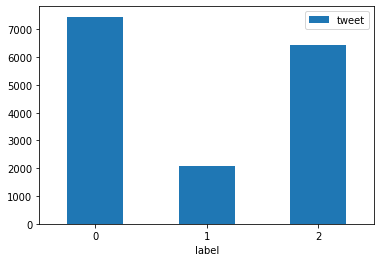

In [ ]:
trainLabelCounts = train_dataset.groupby('label').count()
trainLabelCounts.plot.bar(rot=0)

**Validation dataset**

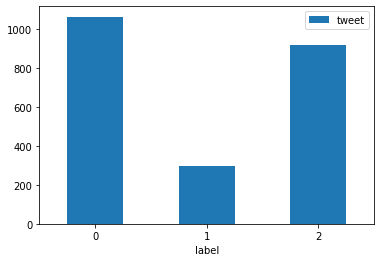

In [ ]:
validationLabelCounts = validation_dataset.groupby('label').count()
validationLabelCounts.plot.bar(rot=0)

**Test Dataset**

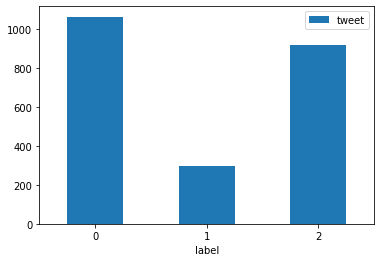

In [ ]:
testLabelCounts = test_dataset.groupby('label').count()
testLabelCounts.plot.bar(rot=0)

As you can see, there are not as many label 1 (anti-vax) tweets as the other two classes. So, we expect less score in class 1.

# Text Preprocessing
Now, we will clean our tweets from useless information in order to make a good vectorization later. More specifically, we will remove tags, urls, punctuation (except ' and ’ because we will need them to remove stopwords like it's), underscore(_) characters, whitespace, single characters, numbers, and we will convert the texts to lowercase because all words are the same in both upper and lower cases. Note that we will keep the hashtags(without the # symbol), because they contain useful information about the tweets.

In [ ]:
def text_preprocessing(text):
  # Remove tags
  text = re.sub(r'@\s?\w+',' ',text)
  # Remove urls
  text = re.sub(r'https?://\S+',' ',text)
  # Remove punctuation(except ' and ’)
  text = re.sub(r'[^’\'\s\w]',' ',text)
  # Remove underscore characters
  text = re.sub(r'_', ' ', text)
  # Remove \r and \n
  text = re.sub(r'[\r\n]',' ', text)
  # Remove single characters
  text = re.sub(r'\s+[a-zA-Z]\s+', ' ',text)
  # Remove single characters from start
  text = re.sub(r'^[a-zA-Z]\s+', '', text)
  # Remove single characters from end
  text = re.sub(r'\s+[a-zA-Z]$', '', text)
  # Remove numbers
  text = re.sub(r'\d+',' ',text)
  # Convert multiple spaces to single space and remove beginning and end spaces
  text = re.sub(r' +',' ',text).strip()
  # Convert to lowercase
  text = text.lower()

  return text

**Train Dataset**

In [ ]:
train_dataset['tweet'] = train_dataset['tweet'].apply(lambda tweet: text_preprocessing(tweet))
train_dataset

,tweet,label
0,sip shop come thru right now marjais popularnobodies mmr sipnshop,0
1,don't know about you but my family and will not take the covid vaccine anytime soon,1
2,immunizations should be mandatory period in oklahoma they won't let kids go to school without them it's dangerous otherwise,2
3,president obama spoke in favor of vaccination for children fox will start telling its viewers to choose against vaccination in,0
4,arizona monitoring hundreds for measles linked to disneyland it's small world after all,0
...,...,...
15971,if believe the anti vax nutcases caused measles are ignoring the obama illegal children who streamed to the us coincidence,1
15972,how do you feel about parents who don't vaccinate their kids measlesoutbreak,0
15973,preschoolers tested for measles in simi valley,0
15974,finance minister budget offers room to procure covid vaccines if available,0


**Validation Dataset**

In [ ]:
validation_dataset['tweet'] = validation_dataset['tweet'].apply(lambda tweet: text_preprocessing(tweet))
validation_dataset

,tweet,label
0,they had massive surge in with covid deaths immediately after the vaccine rollout way more than they had during the entirety of the pandemic up to that point fuck those jabs dr death,1
1,required vaccines for school parents and guardians of children with school exclusion letters now have an,0
2,two more johnson county children have measles,0
3,nv can do better which states are the best and worst at vaccinating their kids,2
4,nothing like killing ourselves our own fear mt vaccine fears have fueled the resurgence of preventable diseases,2
...,...,...
2277,rt number of measles cases reported in cali is at year high officials say uggh not good thing at all,0
2278,evidence points to the idea that measles affects the immune system for two to three years after the disease,0
2279,where's why you should vaccinate your kids in two minutes,2
2280,some of my favorite people have autism if that's your reason for bringing back diseases we have eviscerated fuck you vaccineswork,2


**Test Dataset**

In [ ]:
test_dataset['tweet'] = test_dataset['tweet'].apply(lambda tweet: text_preprocessing(tweet))
test_dataset

,tweet,label
0,they had massive surge in with covid deaths immediately after the vaccine rollout way more than they had during the entirety of the pandemic up to that point fuck those jabs dr death,1
1,required vaccines for school parents and guardians of children with school exclusion letters now have an,0
2,two more johnson county children have measles,0
3,nv can do better which states are the best and worst at vaccinating their kids,2
4,nothing like killing ourselves our own fear mt vaccine fears have fueled the resurgence of preventable diseases,2
...,...,...
2277,rt number of measles cases reported in cali is at year high officials say uggh not good thing at all,0
2278,evidence points to the idea that measles affects the immune system for two to three years after the disease,0
2279,where's why you should vaccinate your kids in two minutes,2
2280,some of my favorite people have autism if that's your reason for bringing back diseases we have eviscerated fuck you vaccineswork,2


# Stopwords Removal
Now, we will remove some stopwords(words that do not have any important value for the texts) from all the tweets.

First, let's download the stopwords that we are going to remove:

In [ ]:
nltk.download('stopwords')
print(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'ea

Then, let's remove them from our datasets:

In [ ]:
def remove_stopwords(text):
  tokens = text.split(' ')
  return ' '.join([w for w in tokens if w not in stopwords.words('english')])

In [ ]:
train_dataset['tweet'] = train_dataset['tweet'].apply(remove_stopwords)
train_dataset

,tweet,label
0,sip shop come thru right marjais popularnobodies mmr sipnshop,0
1,know family take covid vaccine anytime soon,1
2,immunizations mandatory period oklahoma let kids go school without dangerous otherwise,2
3,president obama spoke favor vaccination children fox start telling viewers choose vaccination,0
4,arizona monitoring hundreds measles linked disneyland small world,0
...,...,...
15971,believe anti vax nutcases caused measles ignoring obama illegal children streamed us coincidence,1
15972,feel parents vaccinate kids measlesoutbreak,0
15973,preschoolers tested measles simi valley,0
15974,finance minister budget offers room procure covid vaccines available,0


In [ ]:
validation_dataset['tweet'] = validation_dataset['tweet'].apply(remove_stopwords)
validation_dataset

,tweet,label
0,massive surge covid deaths immediately vaccine rollout way entirety pandemic point fuck jabs dr death,1
1,required vaccines school parents guardians children school exclusion letters,0
2,two johnson county children measles,0
3,nv better states best worst vaccinating kids,2
4,nothing like killing fear mt vaccine fears fueled resurgence preventable diseases,2
...,...,...
2277,rt number measles cases reported cali year high officials say uggh good thing,0
2278,evidence points idea measles affects immune system two three years disease,0
2279,where's vaccinate kids two minutes,2
2280,favorite people autism that's reason bringing back diseases eviscerated fuck vaccineswork,2


In [ ]:
test_dataset['tweet'] = test_dataset['tweet'].apply(remove_stopwords)
test_dataset

,tweet,label
0,massive surge covid deaths immediately vaccine rollout way entirety pandemic point fuck jabs dr death,1
1,required vaccines school parents guardians children school exclusion letters,0
2,two johnson county children measles,0
3,nv better states best worst vaccinating kids,2
4,nothing like killing fear mt vaccine fears fueled resurgence preventable diseases,2
...,...,...
2277,rt number measles cases reported cali year high officials say uggh good thing,0
2278,evidence points idea measles affects immune system two three years disease,0
2279,where's vaccinate kids two minutes,2
2280,favorite people autism that's reason bringing back diseases eviscerated fuck vaccineswork,2


# Model comparison
We will make experiments with different models (different vectorizers and their parameters, and also different C parameter for the logistic regressor) and compare each other's performance. 

## Model 1: Count vectorizer and Logistic Regression


**Text Vectorization**

We will convert all the tweets to vectors in order to be used by the softmax regressor.

In [ ]:
vectorizer = CountVectorizer().fit(train_dataset['tweet'].values)

In [ ]:
X_train = vectorizer.transform(train_dataset['tweet'].values)
X_train

<15976x18205 sparse matrix of type '<class 'numpy.int64'>'
	with 161284 stored elements in Compressed Sparse Row format>

In [ ]:
y_train = train_dataset['label'].values
y_train

array([0, 1, 2, ..., 0, 0, 2])

In [ ]:
X_val = vectorizer.transform(validation_dataset['tweet'].values)
X_val

<2282x18205 sparse matrix of type '<class 'numpy.int64'>'
	with 21504 stored elements in Compressed Sparse Row format>

In [ ]:
y_val = validation_dataset['label'].values
y_val

array([1, 0, 0, ..., 2, 2, 0])

In [ ]:
X_test = vectorizer.transform(test_dataset['tweet'].values)
X_test

<2282x18205 sparse matrix of type '<class 'numpy.int64'>'
	with 21504 stored elements in Compressed Sparse Row format>

In [ ]:
y_test = test_dataset['label'].values
y_test

array([1, 0, 0, ..., 2, 2, 0])

**Training Phase**

In [ ]:
clf = LogisticRegression(max_iter=5000, tol=1e-8, multi_class='multinomial')

In [ ]:
def plot_learning_curve(X_train, y_train, X_val, y_val, model, train_sizes):
  train_scores = []
  validation_scores = []
  for train_size in train_sizes:
    model.fit(X_train[:train_size], y_train[:train_size])
    y_true_pred = model.predict(X_train[:train_size])
    train_scores += [f1_score(y_train[:train_size], y_true_pred, average='weighted')]
    y_pred = model.predict(X_val)
    validation_scores += [f1_score(y_val, y_pred, average='weighted')]
  plt.grid()
  plt.plot(train_sizes, train_scores, "o-", label="Train")
  plt.plot(train_sizes, validation_scores, "o-", label="Validation")
  plt.xlabel("Training examples")
  plt.ylabel("F1 Score")
  plt.legend()
  plt.show()

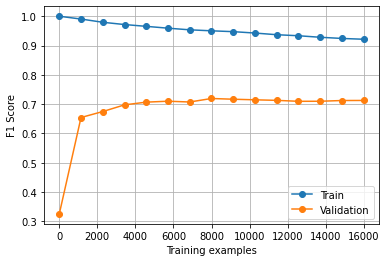

In [ ]:
plot_learning_curve(X_train, y_train, X_val, y_val, clf, np.linspace(10, X_train.shape[0], 15, dtype=np.int))

**Test Evaluation**

In [ ]:
def evaluate_model(model, X_test, y_test):
  y_pred = clf.predict(X_test)
  print(classification_report(y_test, y_pred))
  print("Precision:", precision_score(y_test, y_pred, average='weighted'))
  print("Recall:", recall_score(y_test, y_pred, average='weighted'))
  print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))
  cm = confusion_matrix(y_val, y_pred)
  cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
  cm_disp.plot()
  plt.show()

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1065
           1       0.60      0.45      0.52       296
           2       0.69      0.72      0.71       921

    accuracy                           0.72      2282
   macro avg       0.68      0.65      0.66      2282
weighted avg       0.71      0.72      0.71      2282

Precision: 0.7122716240814401
Recall: 0.7160385626643295
F1 Score: 0.7126295635041843


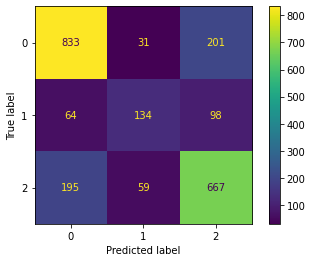

In [ ]:
evaluate_model(clf, X_test, y_test)

As you can see from the learning curve, our model is overfitting because the gap between the train and validation scores is big and both scores are not small. This is due to the large-dimension document vectors which contain useless information(noise).

## Model 2: Count vectorizer with min_df=4, max_df=0.3 and Logistic Regression



We will now reduce the dimensionality of the tweet vectors by considering only words that appear on at least 4 documents and at most 30% of all the documents.

**Text Vectorization**

We will convert all the tweets to vectors in order to be used by the softmax regressor.

In [ ]:
vectorizer = CountVectorizer(min_df=4, max_df=0.3).fit(train_dataset['tweet'].values)

In [ ]:
X_train = vectorizer.transform(train_dataset['tweet'].values)
X_train

<15976x4721 sparse matrix of type '<class 'numpy.int64'>'
	with 142929 stored elements in Compressed Sparse Row format>

In [ ]:
y_train = train_dataset['label'].values
y_train

array([0, 1, 2, ..., 0, 0, 2])

In [ ]:
X_val = vectorizer.transform(validation_dataset['tweet'].values)
X_val

<2282x4721 sparse matrix of type '<class 'numpy.int64'>'
	with 19854 stored elements in Compressed Sparse Row format>

In [ ]:
y_val = validation_dataset['label'].values
y_val

array([1, 0, 0, ..., 2, 2, 0])

In [ ]:
X_test = vectorizer.transform(test_dataset['tweet'].values)
X_test

<2282x4721 sparse matrix of type '<class 'numpy.int64'>'
	with 19854 stored elements in Compressed Sparse Row format>

In [ ]:
y_test = test_dataset['label'].values
y_test

array([1, 0, 0, ..., 2, 2, 0])

**Training Phase**

In [ ]:
clf = LogisticRegression(max_iter=5000, tol=1e-8, multi_class='multinomial')

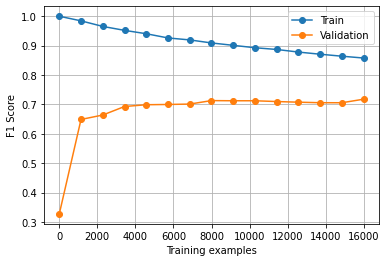

In [ ]:
plot_learning_curve(X_train, y_train, X_val, y_val, clf, np.linspace(10, X_train.shape[0], 15, dtype=np.int))

**Test Evaluation**

              precision    recall  f1-score   support

           0       0.76      0.79      0.78      1065
           1       0.60      0.47      0.53       296
           2       0.70      0.72      0.71       921

    accuracy                           0.72      2282
   macro avg       0.69      0.66      0.67      2282
weighted avg       0.72      0.72      0.72      2282

Precision: 0.7169787720554675
Recall: 0.7208588957055214
F1 Score: 0.7177617297072508


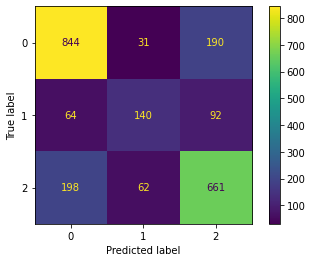

In [ ]:
evaluate_model(clf, X_test, y_test)

Compared to the previous model, we can see some improvements on our model because of the better generalization (less overfitting which can be seen from the learning curve). 

## Model 3: Tf-Idf vectorizer with min_df=4, max_df=0.3 and Logistic Regression



Now, let's try a different vectorizer. We will use tf-idf vectorization, and we expect better accuracy and F1-score because the tf-idf vectorization algorithm gives small weights on words that appear very frequently (and thus are not so useful) and big weights on less frequent words which contain useful information.

**Text Vectorization**

We will convert all the tweets to vectors in order to be used by the softmax regressor.

In [ ]:
vectorizer = TfidfVectorizer(min_df=4, max_df=0.3).fit(train_dataset['tweet'].values)

In [ ]:
X_train = vectorizer.transform(train_dataset['tweet'].values)
X_train

<15976x4721 sparse matrix of type '<class 'numpy.float64'>'
	with 142929 stored elements in Compressed Sparse Row format>

In [ ]:
y_train = train_dataset['label'].values
y_train

array([0, 1, 2, ..., 0, 0, 2])

In [ ]:
X_val = vectorizer.transform(validation_dataset['tweet'].values)
X_val

<2282x4721 sparse matrix of type '<class 'numpy.float64'>'
	with 19854 stored elements in Compressed Sparse Row format>

In [ ]:
y_val = validation_dataset['label'].values
y_val

array([1, 0, 0, ..., 2, 2, 0])

In [ ]:
X_test = vectorizer.transform(test_dataset['tweet'].values)
X_test

<2282x4721 sparse matrix of type '<class 'numpy.float64'>'
	with 19854 stored elements in Compressed Sparse Row format>

In [ ]:
y_test = test_dataset['label'].values
y_test

array([1, 0, 0, ..., 2, 2, 0])

**Training Phase**

In [ ]:
clf = LogisticRegression(max_iter=5000, tol=1e-8, multi_class='multinomial')

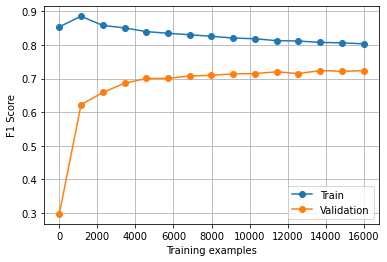

In [ ]:
plot_learning_curve(X_train, y_train, X_val, y_val, clf, np.linspace(10, X_train.shape[0], 15, dtype=np.int))

**Test Evaluation**

              precision    recall  f1-score   support

           0       0.77      0.80      0.78      1065
           1       0.68      0.41      0.51       296
           2       0.69      0.75      0.72       921

    accuracy                           0.73      2282
   macro avg       0.71      0.65      0.67      2282
weighted avg       0.73      0.73      0.72      2282

Precision: 0.726833237840286
Recall: 0.7291849255039439
F1 Score: 0.7231624355988493


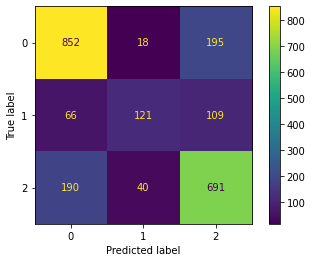

In [ ]:
evaluate_model(clf, X_test, y_test)

As you can see, compared to the count vectorizer, we get much better accuracy because of better vectorization. Can we do better?

## Best model: Tf-Idf vectorizer with min_df=4, max_df=0.3 and Logistic Regression with C=1.83

We will now try to prevent some more overfitting by using a regularization factor(C parameter in LogisticRegression) of 1.83. In my experimets, this value gave the best f1 score increase.

**Text Vectorization**

We will convert all the tweets to vectors in order to be used by the softmax regressor.

In [ ]:
vectorizer = TfidfVectorizer(min_df=4, max_df=0.3).fit(train_dataset['tweet'].values)

In [ ]:
X_train = vectorizer.transform(train_dataset['tweet'].values)
X_train

<15976x4721 sparse matrix of type '<class 'numpy.float64'>'
	with 142929 stored elements in Compressed Sparse Row format>

In [ ]:
y_train = train_dataset['label'].values
y_train

array([0, 1, 2, ..., 0, 0, 2])

In [ ]:
X_val = vectorizer.transform(validation_dataset['tweet'].values)
X_val

<2282x4721 sparse matrix of type '<class 'numpy.float64'>'
	with 19854 stored elements in Compressed Sparse Row format>

In [ ]:
y_val = validation_dataset['label'].values
y_val

array([1, 0, 0, ..., 2, 2, 0])

In [ ]:
X_test = vectorizer.transform(test_dataset['tweet'].values)
X_test

<2282x4721 sparse matrix of type '<class 'numpy.float64'>'
	with 19854 stored elements in Compressed Sparse Row format>

In [ ]:
y_test = test_dataset['label'].values
y_test

array([1, 0, 0, ..., 2, 2, 0])

**Training Phase**

In [ ]:
clf = LogisticRegression(max_iter=5000, tol=1e-8, C=1.83, multi_class='multinomial')

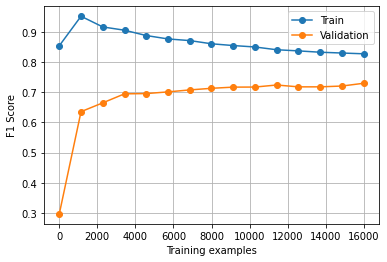

In [ ]:
plot_learning_curve(X_train, y_train, X_val, y_val, clf, np.linspace(10, X_train.shape[0], 15, dtype=np.int))

**Test Evaluation**

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1065
           1       0.65      0.45      0.53       296
           2       0.70      0.75      0.73       921

    accuracy                           0.73      2282
   macro avg       0.71      0.67      0.68      2282
weighted avg       0.73      0.73      0.73      2282

Precision: 0.7309318630270937
Recall: 0.7340052585451359
F1 Score: 0.7296732963585068


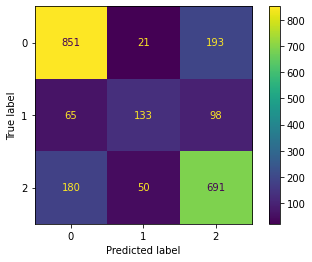

In [ ]:
evaluate_model(clf, X_test, y_test)

As you can see, the test f1 score has increased by a significant amount, which means better regularization!!!

# Conclusion
The key to NLP tasks is to find the best vectorization method that produces text vectors that contain as much useful information as possible and also are not too big in dimension. 

Also, the dataset must be as balanced as possible in order to be able to predict all the labels as accurately as possible. This can be seen from the fact that the label 1 predictions in this dataset are not as good as the other labels, because as i showed in the beginning, label 1 has much less examples than the other labels.